In [ ]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- *El primer paso para entrenar un modelo es convertir nuestros datos, ya sean imágenes, tablas, audio o texto, en una representación númerica que nuestros modelos puedan interpretar.*
- *Asumimos que nuestros datos se generan a partir de la siguiente ecuación lineal:*
$$
y = 0.3 + 0.7\cdot X
$$
- *En la realidad no conocemos los parámetros poblacionales que definen a esta ecuación (i.e., no conocemos que la ordenada al origen es $0.3$ y la pendiente es $0.7$), por lo que tenemos que estimarlos.*
- *Definimos el siguiente modelo teórico:*
$$
y = \beta_{0} + \beta_{1}\cdot X
$$
- *Nuestro objetivo es entrenar este modelo y obtener una estimación para $\beta_{0}$ y para $\beta_{1}$ que nos permita aproximar nuestro modelo a los datos.*

In [2]:
torch.manual_seed(42)

# Define the parameters for the data generation ecuation
weight = 0.7
bias = 0.3

# Generate data for X
X = torch.arange(start= 0, end=1, step=0.01).unsqueeze(1)

# Generate the target data using the linear equation
y = bias + weight * X

### Dividir nuestros datos
- *Luego de convertir nuestros datos a una representación númerica (i.e., tensor) para que nuestro modelo los pueda interpretar, es necesario particionarlos en (casi siempre) tres muestras:*
    1. *La primera muestra, que usualmente representa entre el $60-80\%$ de los datos, es la muestra de entrenamiento. Estos son los datos que vamos a utilizar para entrenar al modelo.*
        - *Pensar a esta muestra como el material de estudio (i.e., libros de texto, papers académicos, presentaciones, etc.) de un curso. De la misma manera que un estudiante utiliza el material de estudio para aprender los conceptos de la materia, el modelo va a utilizar la muestra de entrenamiento para aprender los patrones subyacentes en los datos.*
    2. *La segunda muestra, que usualmente representa entre el $10-20\%$ de los datos, es la muestra de validación. Estos son los datos que vamos a utlizar durante el entrenamiento para validar si nuestro modelo está aprendiendo correctamente los patrones subyacente a los datos, o si está memorizando.*<sup>1</sup>
        - *Pensar a esta muestra como un examen de muestra. De la misma manera que el estudiante utiliza este examen para validar sus conocimientos y determinar en que temas tiene que mejorar, el modelo va a utilizar esta muestra para determinar si está aprendiendo los patrones en los datos o está memorizando.*
    3. *La tercera muestra, que usualmente representa el $10-20\%$ restante de los datos, es la muestra de evaluación. Estos son los datos que vamos a utilizar para evaluar la performance de nuesto modelo una vez entrenado.*<sup>2</sup>
        - *Pensar a la muestra de evaluación como el examen final. De la misma manera que el estudiante demuestra los conocimientos aprendidos en este examen, el modelo va a utilizar la muestra de entrenamiento para hacer inferencia sobre datos nunca antes vistos, demostrando que tan bien logró aprender los patrones de los datos.*

<sup>1</sup> *El objetivo es que nuestro modelo logré generalizar a los datos. Qué significa esto? Esto signfica que buscamos que nuestro modelo aprenda los patrones subyacentes a los datos y que luego use esos patrones que aprendió para realizar predicciones para observaciones que nunca antes vio. Entonces, es importante que si el modelo no está aprendiendo los patrones en los datos y, en cambio, está memorizando los datos de entrenamiento, podamos corregirlo a tiempo.*

<sup>2</sup> ***IMPORTANTE.** La muestra de evaluación se tiene que utilizar únicamente al finalizar el entrenamiento. Nos tenemos que asegurar que el modelo haya visto los datos de esta muestra durante el entrenamiento. Caso contrario estaríamos sobre-estimando la performance de nuestro modelo.*

- *Para este ejemplo vamos a particionar los datos de forma manual, utilizando los índices de nuestros tensores, pero podríamos utilizar la función `sklearn.model_selection.train_test_split()` para particionar nuestro dataset de forma aleatoria.*

In [3]:
X_train = X[:80, :]
y_train = y[:80, :]
X_test = X[80:, :]
y_test = y[80:, :]

In [ ]:
print(f'X: {X.shape}')
print(f'X_train: {X_train.shape} ({100 * (X_train.shape[0] / X.shape[0]): .2f}%)')
print(f'X_test: {X_test.shape} ({100 * (X_test.shape[0] / X.shape[0]): .2f}%)\n')

print(f'y: {y.shape}')
print(f'y_train: {y_train.shape} ({100 * (y_train.shape[0] / y.shape[0]): .2f}%)')
print(f'y_test: {y_test.shape} ({100 * (y_test.shape[0] / y.shape[0]): .2f}%)')

X shape: torch.Size([100, 1])
X_train shape: torch.Size([80, 1]) ( 80.00%)
X_test shape: torch.Size([20, 1]) ( 20.00%)

y shape: torch.Size([100, 1])
y_train shape: torch.Size([80, 1]) ( 80.00%)
y_test shape: torch.Size([20, 1]) ( 20.00%)


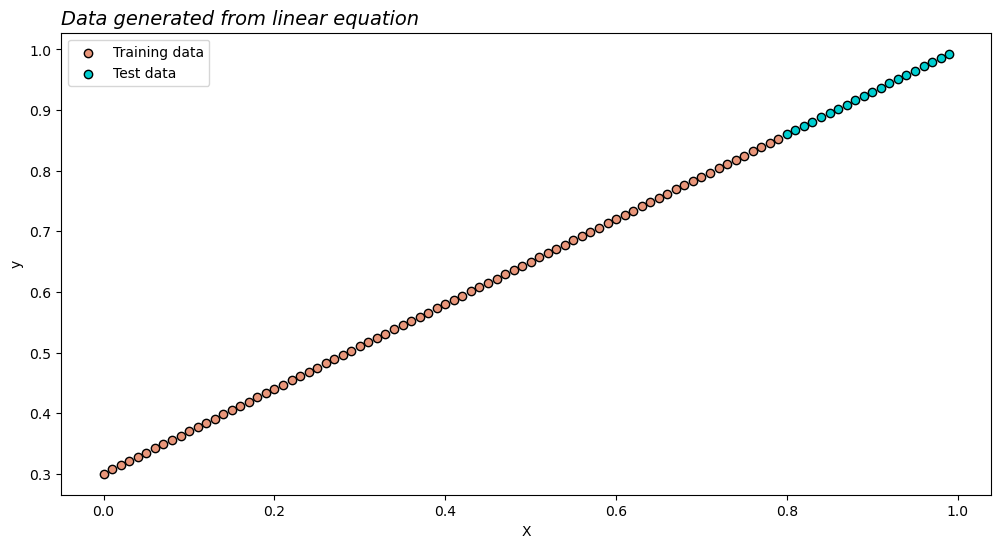

In [5]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X_train, y_train, color='darksalmon', edgecolors='black', label="Training data")
ax.scatter(X_test, y_test, color='darkturquoise', edgecolors='black', label="Test data")
ax.set_xlabel("X")
ax.set_ylabel("y")
ax.set_title("Data generated from linear equation", loc='left', fontdict={'fontsize': 14, 'fontstyle': 'italic'})
ax.legend(prop=({'size': 10}))

- *Para guardar los datos vamos a primero concatenarlos en dos tensores: `train_data` y `test_data`.*
- *Utilizamos la función `torch.save()` para guardar nuestro tensor en formato `.pt`. Guardar nuestros tensores de esta manera tiene muchas ventajas, principalmente que preserva el tipo de dato del tensor y los carga más rápido.*

In [7]:
train_data = torch.cat((X_train, y_train), dim=1)
test_data = torch.cat((X_test, y_test), dim=1)

# Save data
torch.save(train_data, 'temp/data/train_data.pt')
torch.save(test_data, 'temp/data/test_data.pt')